1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

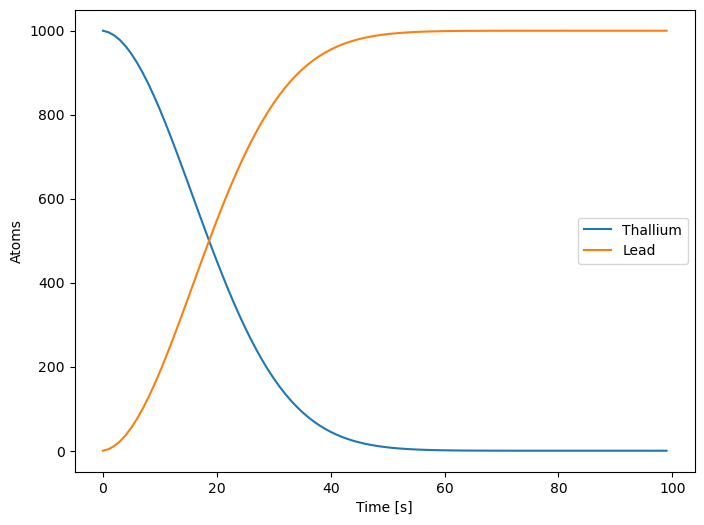

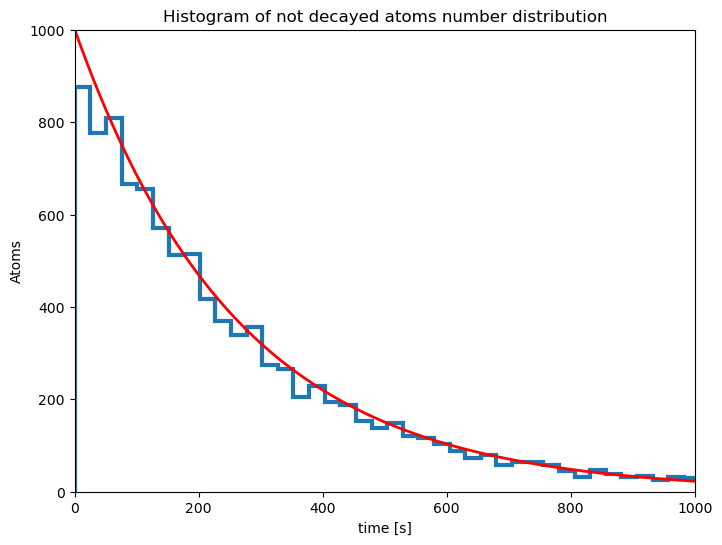

In [6]:
# Setting data
NTi = 1000
NPb = 0
tau = 3.052*60
Ti = []
Pb = []
t = np.arange(0,100,1)

# Defining p(t)
def p(x,tau):
    return 1 - 2**(-x/tau)

# Creating the decay chain
for i in range(len(t)):
    NPb = NPb + NTi*p(t[i],tau)
    NTi = NTi - NTi*p(t[i],tau)
    Ti.append(NTi)
    Pb.append(NPb)
    
# Plotting decay chain
plt.figure(figsize=(8,6))
plt.plot(t,Ti,label='Thallium')
plt.plot(t,Pb,label= 'Lead')
plt.xlabel('Time [s]')
plt.ylabel('Atoms')
plt.legend()


# Defining the new p(t), its CDF and its inverse

def p2(t, tau):
    return (2**(-t/tau) * math.log(2)/tau)

def p2_cdf(t, tau):
    return 1. - 2**(-t/tau)

def p2_inv(x,tau):
    return -tau*np.log2(1-x)

# Inverse transform method and plotting the histogram of not decayed atoms number distribution

Nti = 1000

u = np.random.random(10000)
v = p2_inv(u, tau) 

time = np.arange(0,1000,1) 
plt.figure(figsize=(8,6))
plt.hist(v, histtype='step', bins=100, density=False, linewidth=3)
plt.plot(time, Nti*(1-p2_cdf(time,tau)), linewidth=2, color='red')
plt.axis([0, 1000, 0 ,1000])
plt.xlabel('time [s]')
plt.ylabel('Atoms')
plt.title('Histogram of not decayed atoms number distribution')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

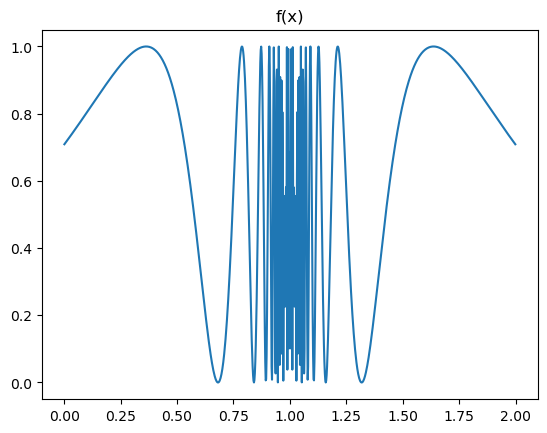

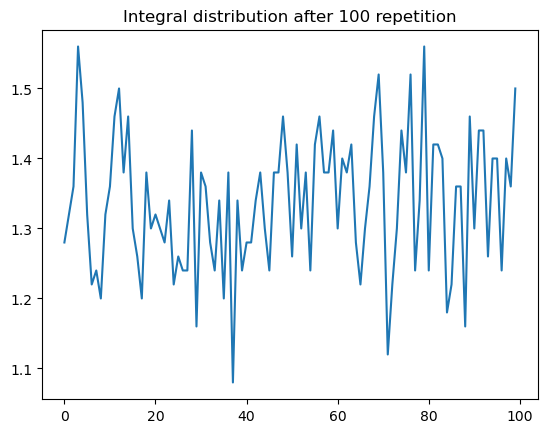

Mean of integral distribution : 1.3374000000000004
Std of integral distribution : 0.09714545794837758 

Integral value with the Mean Value Method:  1.3009376363065501
Sigma with the Mean Value Method:  0.06389345873291453


In [7]:
# Defining and plotting f(x)
def f(x):
    return (np.sin(1 / (1-x))) ** 2

x = np.linspace(0.001,1.999,1000)
plt.figure()
plt.plot(x,f(x))
plt.title('f(x)')
plt.show()

# Monte Carlo Integration
I_list = []
N = 100
for j in range(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
        I = 2 * count / N
    I_list.append(I)
    I = 0
mean = np.mean(I_list)
std = np.std(I_list)

plt.figure()
plt.plot(I_list)
plt.title('Integral distribution after 100 repetition')
plt.show()

print('Mean of integral distribution :' , mean)
print('Std of integral distribution :' , std, '\n')

# Mean Value method
f_list = []
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    f_list.append(f(x))

I_mv = 2/N * np.sum(f_list)
sigma_mv = 2 * np.sqrt(np.var(f_list)) / np.sqrt(N)
print('Integral value with the Mean Value Method: ' , I_mv)
print('Sigma with the Mean Value Method: ', sigma_mv)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [8]:
# Defining monte carlo integration function
def mc_sphere(a,b,D,N):
    I_list = []
    for j in range(N):
        count = 0
        for i in range(N):
            x = np.random.uniform(a,b, size=D)
            if np.linalg.norm(x) <= 1: count += 1
            I = ((b-a) ** D * count) / N
        I_list.append(I)
        I = 0
    return I_list      

circle_area= np.mean(mc_sphere(-1,1,2,100))
print('Circle area calculated by Monte Carlo Integration is : ' , circle_area , ' while the expected value is ', np.pi, '\n')

tend_sphere_area = np.mean(mc_sphere(-1,1,10,100))
print('10D hyper-volume calculated by Monte Carlo Integration is : ', tend_sphere_area, ' while the expected value is 2.55016403987' )

Circle area calculated by Monte Carlo Integration is :  3.136399999999999  while the expected value is  3.141592653589793 

10D hyper-volume calculated by Monte Carlo Integration is :  1.9456  while the expected value is 2.55016403987


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

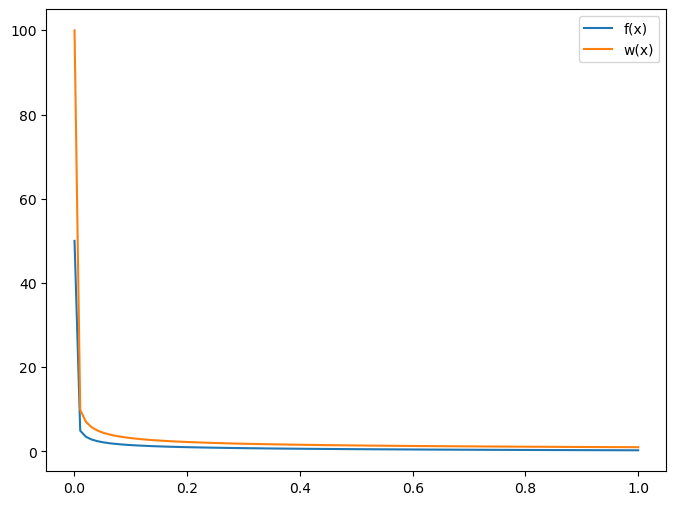

Value of the integral with importance sampling method:  0.836639581029278


In [9]:
# Defining f(x) and g(x)
x = np.linspace(0.0001,1,100)
n = 100

def f(x):
    return (x ** -0.5) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)


# Plotting f(x) and g(x)
plt.figure(figsize=(8,6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,w(x),label='w(x)')
plt.legend()
plt.show()

# Importance Sampling Method

def ISM(a,b,N):
    If = []
    Iw = []
    for i in range(N):
        x = np.random.uniform(a,b)**2
        If.append(f(x))
        Iw.append(w(x))
    I = ((b-a)/N)*np.sum(np.array(If)/np.array(Iw))
    return I

print('Value of the integral with importance sampling method: ', ISM(-1,1,N))